## Иван Заваруев 
## ПИ19-1в
### 23.09.2022

In [3]:
import networkx as nx
import random

class Seminar2():
    def __init__(self, n):
        random.seed(75)
        self.g = self.create_graph(n)
        self._dist = self.create_dist(self.g)
        self.radius, self.center, self.diameter, self.perithery = self.get_dist_metrics(self._dist)
    
    def __repr__(self):
        nx.draw(self.g, with_labels=True)
        return f'Graph of order {len(self.g)}'
    
    @property
    def dist(self):
        N = len(self._dist)
        if N > 39:
            print('Слишком много вершин, матрица не поместится в выводе.')
            return

        for i in range(N):
            for j in range(N):
                if (self._dist.get(i) and self._dist.get(i).get(j)):
                    print(f'{self._dist.get(i).get(j):02d}', end=' ')
                else: print('--', end=' ')
            print()
    
    @staticmethod
    def create_graph(n):
        g = nx.Graph() # Создание экземпляра графа
        g.add_nodes_from(range(n)) # Добавляем 50 вершин
        for i in range(n):
            for j in range(n):
                w = random.randint(3, 10) if i != j else 0
                g.add_edge(i, j, weight=w)
        return g
    
    @staticmethod
    def create_dist(graph):
        N = len(graph)
        dist = {
            i: {
                j: 
                    0 if (i == j) else
                    (
                        graph[i][j]['weight'] if graph.has_edge(i, j)
                        else float('inf')
                    )
                for j in range(N)
            }
            for i in range(N)
        }

        for k in range(N):
            for j in range(N):
                for i in range(N):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
        return dist
    
    @staticmethod
    def get_dist_metrics(dist):
        eccentricities = {a: max(neighs.values()) for a, neighs in dist.items()}
        radius, diameter = float('inf'), 0
        center, perithery = set(), set()
        for a, e in eccentricities.items():
            if e == radius:
                center.add(a)
            if e == diameter:
                perithery.add(a)
            if e < radius:
                radius = e
                center = {a}
            if e > diameter:
                diameter = e
                perithery = {a}
        return radius, center, diameter, perithery
                
    
    

Graph of order 30

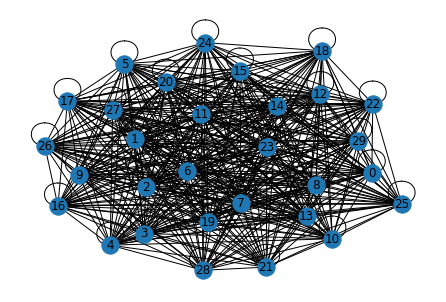

In [4]:
g = Seminar2(30)
g

In [101]:
g.radius, g.center, g.diameter, g.perithery

(7, {8, 11, 25}, 9, {7, 9, 10, 15, 19, 21, 22, 24, 27})

In [100]:
g.dist

-- 03 07 07 07 06 07 03 06 03 06 05 05 06 06 04 06 05 05 06 06 08 06 06 07 03 04 05 06 06 
03 -- 07 06 04 08 06 06 03 06 03 05 07 07 07 06 07 06 06 05 05 08 04 06 06 05 04 07 03 06 
07 07 -- 07 06 06 03 06 07 07 08 07 07 06 03 08 06 05 06 08 07 03 03 07 06 07 07 08 06 08 
07 06 07 -- 06 05 07 07 04 07 04 04 03 06 07 07 04 07 04 04 07 07 04 04 05 05 06 08 07 05 
07 04 06 06 -- 08 03 06 05 05 07 03 03 03 07 06 06 06 05 08 05 07 06 07 07 06 07 06 06 04 
06 08 06 05 08 -- 08 08 05 04 05 07 08 06 07 06 06 06 06 06 06 03 05 06 08 03 06 08 08 05 
07 06 03 07 03 08 -- 06 07 08 06 06 04 06 04 05 03 08 04 05 08 05 04 07 04 05 04 08 06 07 
03 06 06 07 06 08 06 -- 07 06 03 05 04 03 06 06 07 07 08 09 06 07 07 07 07 06 07 03 08 06 
06 03 07 04 05 05 07 07 -- 06 06 06 05 06 07 03 04 06 07 06 05 05 06 06 05 06 06 04 04 03 
03 06 07 07 05 04 08 06 06 -- 08 06 04 06 05 03 05 04 05 06 06 07 04 03 09 03 06 06 06 03 
06 03 08 04 07 05 06 03 06 08 -- 07 07 06 05 09 04 04 08 07 06 05 05 07 04 07 06 05 06 07 

In [17]:
sorted_edges = sorted(
    g.g.edges(data="weight"),
    key=lambda x: x[2])
sorted_edges = list(filter(
    lambda x: x[2] != 0,
    sorted_edges))
# sorted_edges
 
trees = []
for edge in sorted_edges:
    


[(0, 1, 3),
 (0, 7, 3),
 (0, 9, 3),
 (0, 25, 3),
 (1, 8, 3),
 (1, 10, 3),
 (1, 28, 3),
 (2, 6, 3),
 (2, 14, 3),
 (2, 21, 3),
 (2, 22, 3),
 (3, 12, 3),
 (4, 6, 3),
 (4, 11, 3),
 (4, 12, 3),
 (4, 13, 3),
 (5, 21, 3),
 (5, 25, 3),
 (6, 16, 3),
 (7, 10, 3),
 (7, 13, 3),
 (7, 27, 3),
 (8, 15, 3),
 (8, 29, 3),
 (9, 15, 3),
 (9, 23, 3),
 (9, 25, 3),
 (9, 29, 3),
 (11, 18, 3),
 (11, 28, 3),
 (13, 15, 3),
 (13, 25, 3),
 (13, 27, 3),
 (14, 16, 3),
 (14, 18, 3),
 (15, 19, 3),
 (15, 25, 3),
 (16, 25, 3),
 (17, 21, 3),
 (17, 28, 3),
 (17, 29, 3),
 (18, 21, 3),
 (18, 22, 3),
 (18, 28, 3),
 (19, 25, 3),
 (20, 25, 3),
 (20, 27, 3),
 (20, 29, 3),
 (22, 28, 3),
 (23, 25, 3),
 (23, 26, 3),
 (23, 29, 3),
 (24, 28, 3),
 (25, 26, 3),
 (26, 28, 3),
 (26, 29, 3),
 (0, 15, 4),
 (0, 26, 4),
 (1, 4, 4),
 (1, 22, 4),
 (1, 26, 4),
 (3, 8, 4),
 (3, 10, 4),
 (3, 11, 4),
 (3, 16, 4),
 (3, 18, 4),
 (3, 19, 4),
 (3, 22, 4),
 (3, 23, 4),
 (4, 29, 4),
 (5, 9, 4),
 (6, 12, 4),
 (6, 14, 4),
 (6, 18, 4),
 (6, 22, 4),
 (6, 2

In [18]:
{1,2,3}[0]

<>:1: SyntaxWarning: 'set' object is not subscriptable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'set' object is not subscriptable; perhaps you missed a comma?
<ipython-input-18-3f9de2f905c3>:1: SyntaxWarning: 'set' object is not subscriptable; perhaps you missed a comma?
  {1,2,3}[0]


TypeError: 'set' object is not subscriptable

In [16]:
list(filter(lambda x: x < 2, [1,2,3]))

[1]